# KMeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

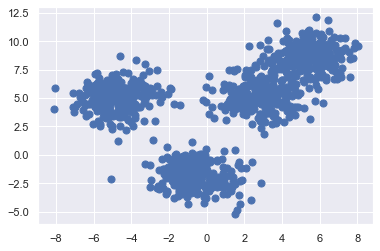

In [51]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=1.11)
plt.scatter(X[:, 0], X[:, 1], s=50);

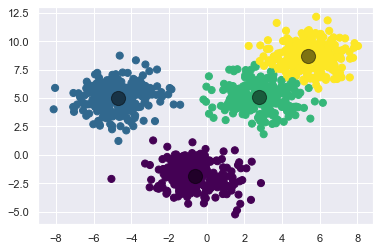

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True, init='random')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

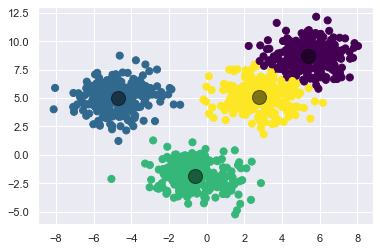

In [60]:
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [25]:
# Initialize yourself

In [61]:
class my_KMeans:
    def __init__(self, k, method='random', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
        pass
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(X.shape[0], self.k)]
        if self.method == 'k-means++':
            # your code here
            self.initial_centers = X[np.random.choice(X.shape[0], 1)]
            for _ in range(self.k - 1):
                self.dist_matrix = np.zeros((X.shape[0], self.initial_centers.shape[0]))
                
                for i in range(X.shape[0]):
                    for j in range(self.initial_centers.shape[0]):
                        self.dist_matrix[i,j] = np.sqrt(np.sum((X[i] - self.initial_centers[j])**2))
                self.initial_centers = np.concatenate((self.initial_centers, np.reshape(X[np.argmax(np.sum(self.dist_matrix, axis = 1))], (1,-1))))
#             print(self.initial_centers)
            return self.initial_centers
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            if ((np.sort(new_centroids, axis = 0) - np.sort(self.centroids, axis = 0)) < 0.0000000001).all(): # fix me
                break
            self.centroids = new_centroids
        return self.centroids
            
    def expectation(self, X, centroids):
        # your code here
        self.distances = np.zeros((X.shape[0],self.k))
        
        for i in range(X.shape[0]):
            for j in range(self.k):
                self.distances[i,j] = np.sqrt(np.sum((X[i] - centroids[j])**2))

        return np.argmin(self.distances, axis=1)

    def maximization(self, X, clusters):
        # your code here
        self.new_centroids = []
        
        for m in range(self.k):
            self.new_centroids.append(np.mean(X[clusters == m],axis=0))
        
        return np.array(self.new_centroids)

    def predict(self, X):
        # return predictions using expectation function
        return self.expectation(X, self.centroids)
    
    def predict_proba(self, X):
        # ideas ?
        self.ddist = np.zeros((X.shape[0],self.k))
        self.sums = np.zeros((X.shape[0],1))
        
        for i in range(X.shape[0]):
            for j in range(self.k):
                self.ddist[i,j] = np.sum((X[i] - self.centroids[j])**2)
        self.ddist -= np.max(self.ddist, axis = 1).reshape(-1, 1)
        self.ddist /= np.sum(self.ddist, axis = 1).reshape(-1, 1)
        
        return np.round(self.ddist, 3)

[[-2.95471228 -2.1945458 ]
 [ 5.59937576  9.42812605]
 [ 5.4929059   9.10300138]
 [-0.5645123  -0.37846853]]


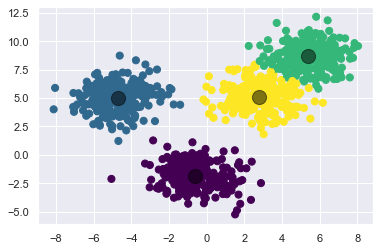

In [62]:
# random initial centers choice, as for the sklrean's kmeans my_kmeans have some instability

my_kmeans = my_KMeans(k=4)

current_centroids = my_kmeans.init_centers(X)
print(current_centroids)
my_kmeans.expectation(X, current_centroids)
my_kmeans.maximization(X, my_kmeans.expectation(X, current_centroids))

my_kmeans.fit(X)

my_y_means = my_kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=my_y_means, s=50, cmap='viridis')

centers = my_kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

[[ 5.75606861  8.77935434]
 [-5.06356562 -2.12305165]
 [-8.05376413  5.90049038]
 [ 6.41590868 11.85721529]]


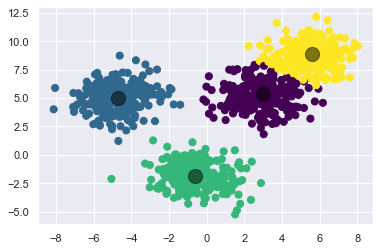

In [64]:
# Kmeans++ initial centers choice

my_kmeans = my_KMeans(k=4,method="k-means++")

current_centroids = my_kmeans.init_centers(X)
print(current_centroids)
my_kmeans.expectation(X, current_centroids)
my_kmeans.maximization(X, my_kmeans.expectation(X, current_centroids))

my_kmeans.fit(X)

my_y_means = my_kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=my_y_means, s=50, cmap='viridis')

centers = my_kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [65]:
# "probabilities" of belonging to claster i
my_kmeans = my_KMeans(k=4)

current_centroids = my_kmeans.init_centers(X)
my_kmeans.expectation(X, current_centroids)
my_kmeans.maximization(X, my_kmeans.expectation(X, current_centroids))

my_kmeans.fit(X)

my_y_means = my_kmeans.predict(X)

y_proba = my_kmeans.predict_proba(X)
y_proba

array([[-0.   ,  0.482,  0.199,  0.32 ],
       [-0.   ,  0.478,  0.19 ,  0.332],
       [ 0.222, -0.   ,  0.359,  0.419],
       ...,
       [-0.   ,  0.517,  0.145,  0.338],
       [-0.   ,  0.509,  0.144,  0.347],
       [-0.   ,  0.493,  0.179,  0.329]])

In [66]:
# checking that these are truly giving some info 
my_y_means - np.argmax(y_proba, axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Agglomerative Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

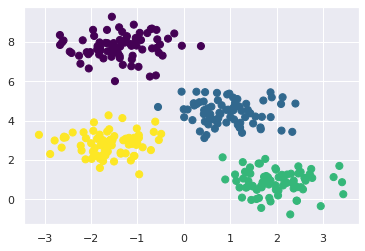

In [44]:
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=10)
y_ac = ac.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_ac, s=50, cmap='viridis')